In [1]:
!pip install geopandas
!pip install matplotlib
from random import uniform
from random import randrange
from random import normalvariate
from random import randrange
import datetime 
from random import randint
import pandas as pd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import datetime 
import matplotlib.pyplot as plt


In [2]:


startDate = datetime.datetime(2018, 1, 1, 00,00)



locations = ["US", "UK", "NZ", "AU", "IN", "IR", "AF", "HK", "CH", "PH", "FR", "SW", "GE","PK", "BR"]

In [16]:
# data generation, generating 500, 1000000 data files

l = []
for j in range(0,500):
    l = []
    for i in range(0,1000000):
        l.append({"Timestamp": startDate+datetime.timedelta(seconds=randrange(1000000000)), "Temperature": normalvariate(15,10), "Location": [round(uniform(-90, 90),6), round(uniform(-180,180),6)], "Observatory": locations[randint(0,14)]})
    df = pd.DataFrame(l)
    df = df.mask(np.random.random(df.shape) < .3)
    df.to_csv(str(j)+".csv")

KeyboardInterrupt: 

In [3]:
# for demonstration purposes
l = []
for i in range(0,1000000):
        l.append({"Timestamp": startDate+datetime.timedelta(seconds=randrange(500000000)), "Temperature": normalvariate(15,10), "Location": [round(uniform(-90, 90),6), round(uniform(-180,180),6)], "Observatory": locations[randint(0,14)]})

df = pd.DataFrame(l)

In [4]:
df = df.mask(np.random.random(df.shape) < .3)


Dropping all empty cells and sorting values using timestamp metric and resetting the index of the dataframe


In [5]:
df = df.dropna()

In [6]:
df = df.sort_values(by = "Timestamp", ascending= True)

In [7]:
df.reset_index(drop = True, inplace = True)

In [8]:
df

,Timestamp,Temperature,Location,Observatory
0,2018-01-01 00:07:05,17.235806,"[-18.467548, 25.053011]",US
1,2018-01-01 00:32:18,15.696138,"[-25.244904, 175.279849]",PK
2,2018-01-01 01:30:14,15.778012,"[11.020871, 68.75548]",UK
3,2018-01-01 02:37:53,21.049981,"[83.764468, 69.026433]",PK
4,2018-01-01 03:00:34,3.501090,"[-59.315573, 87.744386]",NZ
...,...,...,...,...
240443,2033-11-04 23:07:08,19.042895,"[-75.008307, 83.642194]",SW
240444,2033-11-04 23:36:30,22.151350,"[-33.514402, 135.103971]",FR
240445,2033-11-04 23:44:17,8.627700,"[-13.990914, 63.268575]",US
240446,2033-11-05 00:07:22,24.793437,"[-33.633138, -33.954968]",UK


[2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032


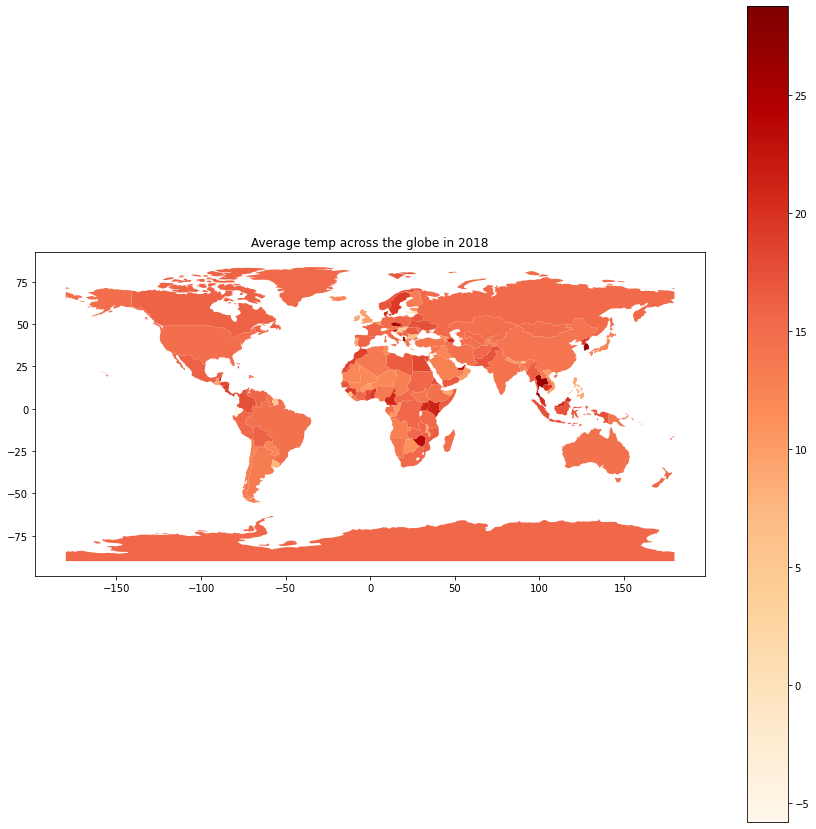

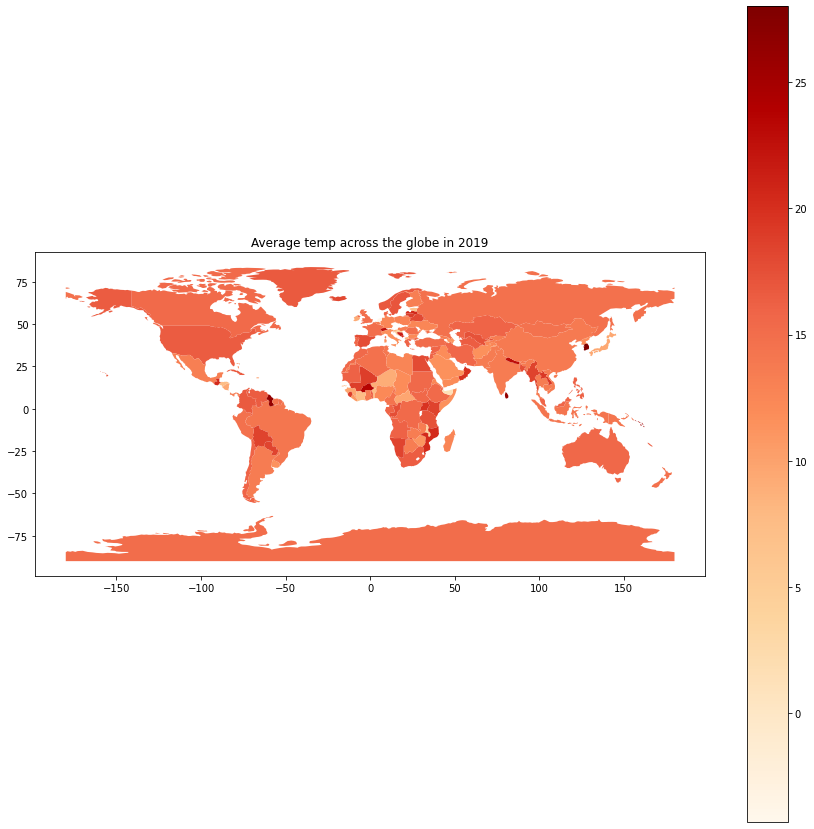

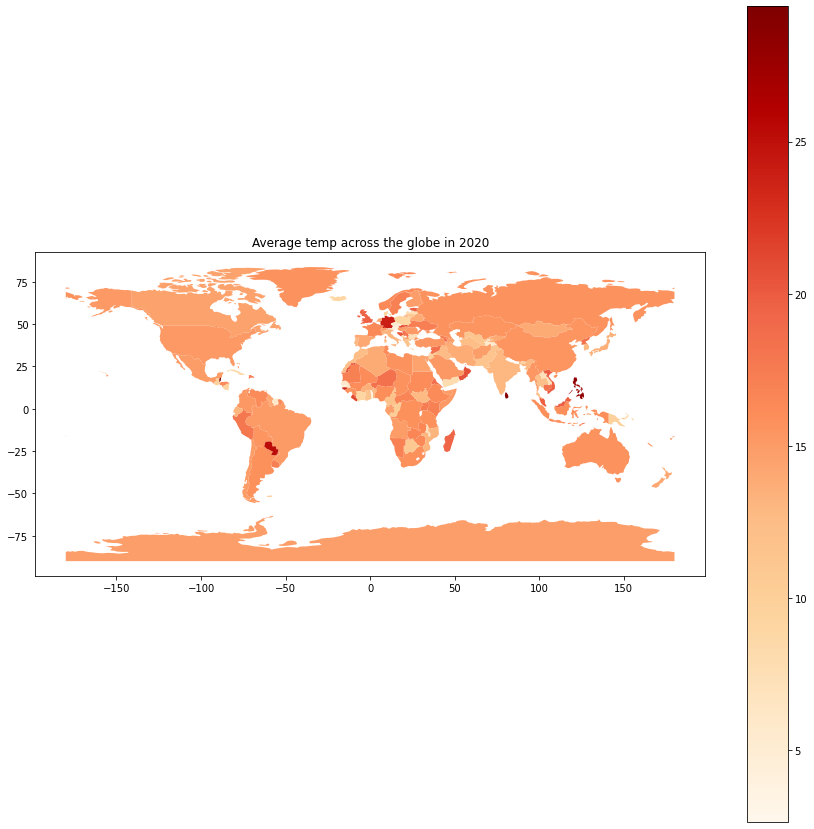

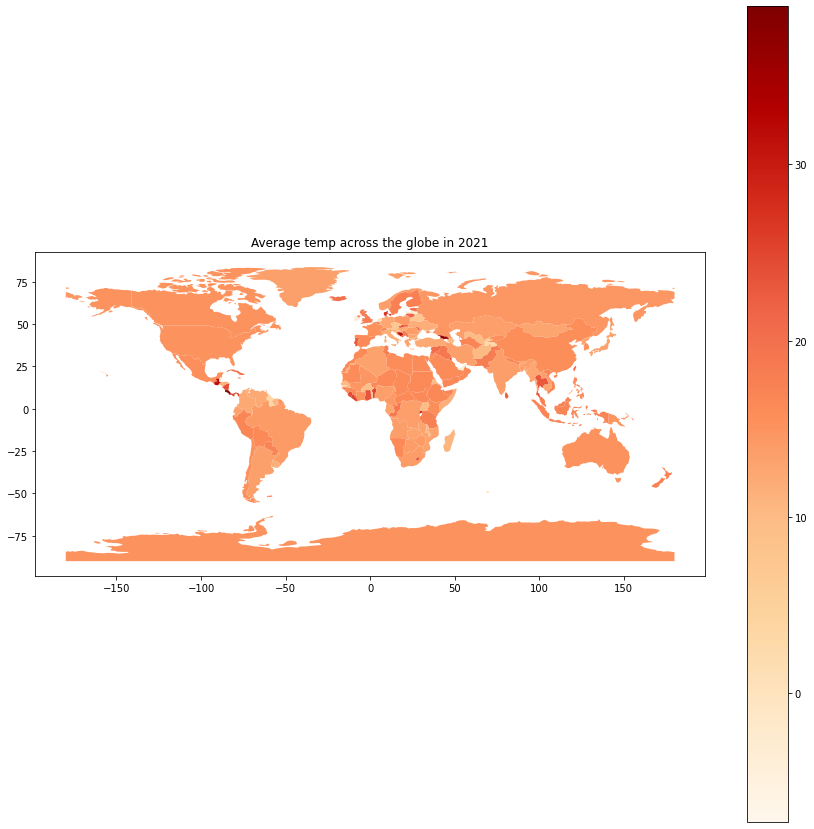

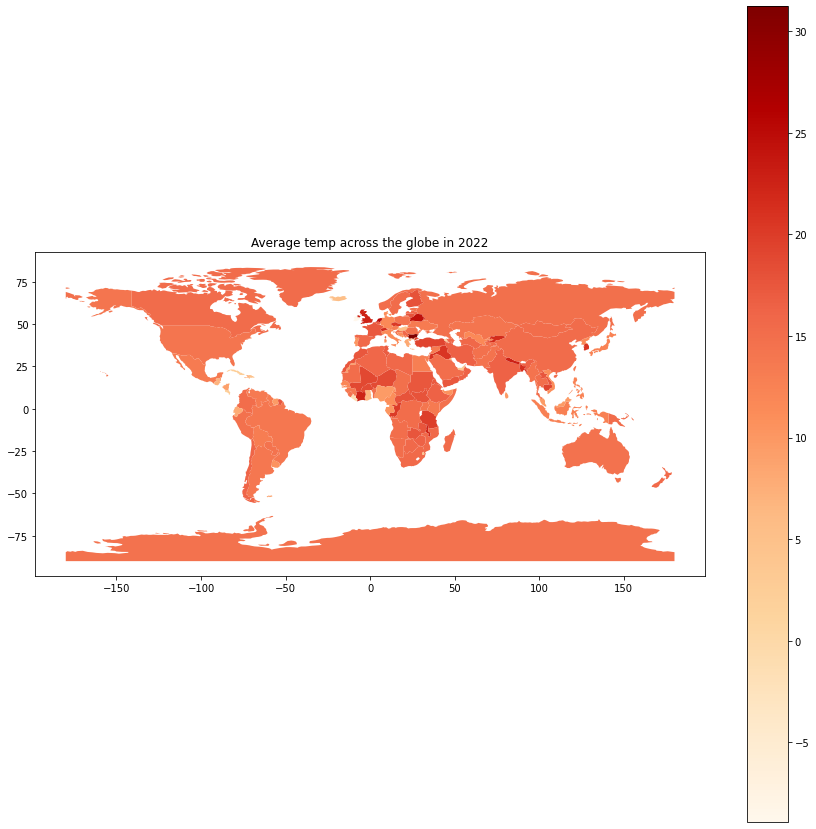

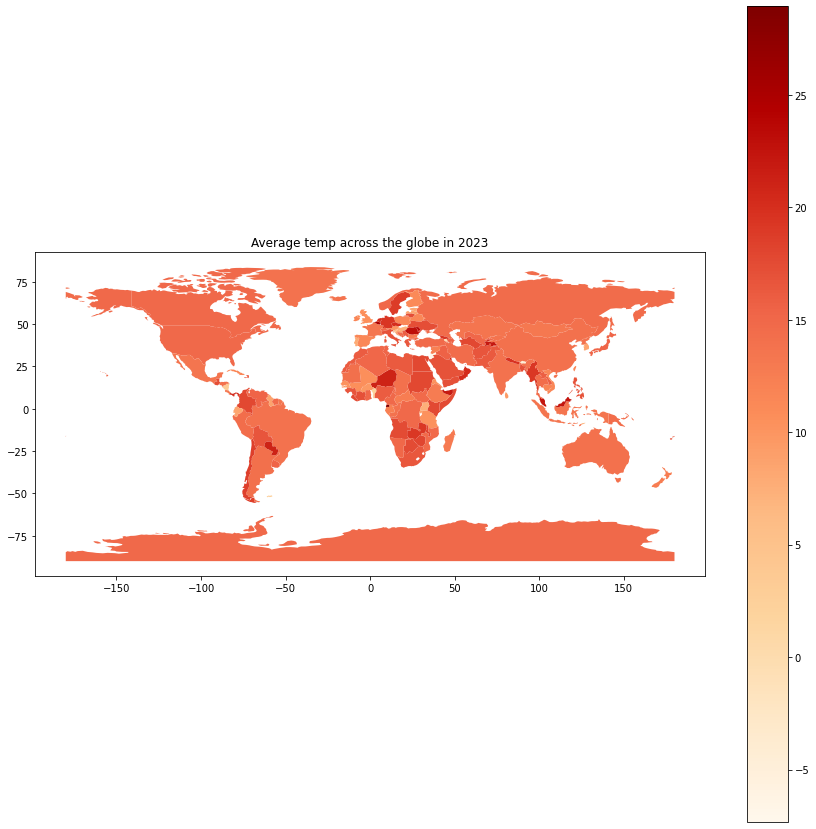

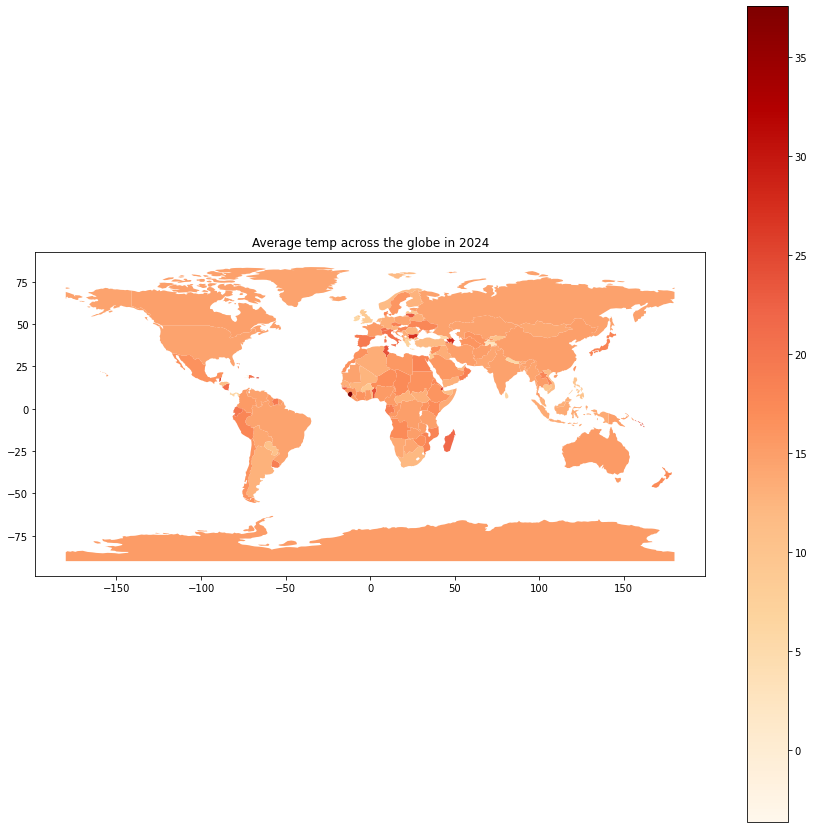

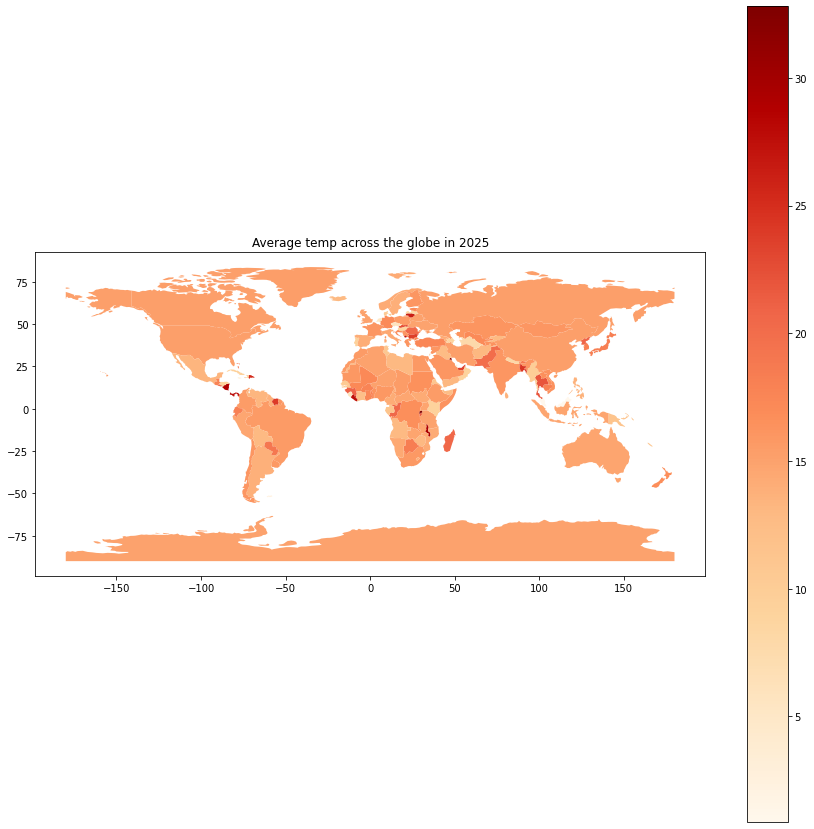

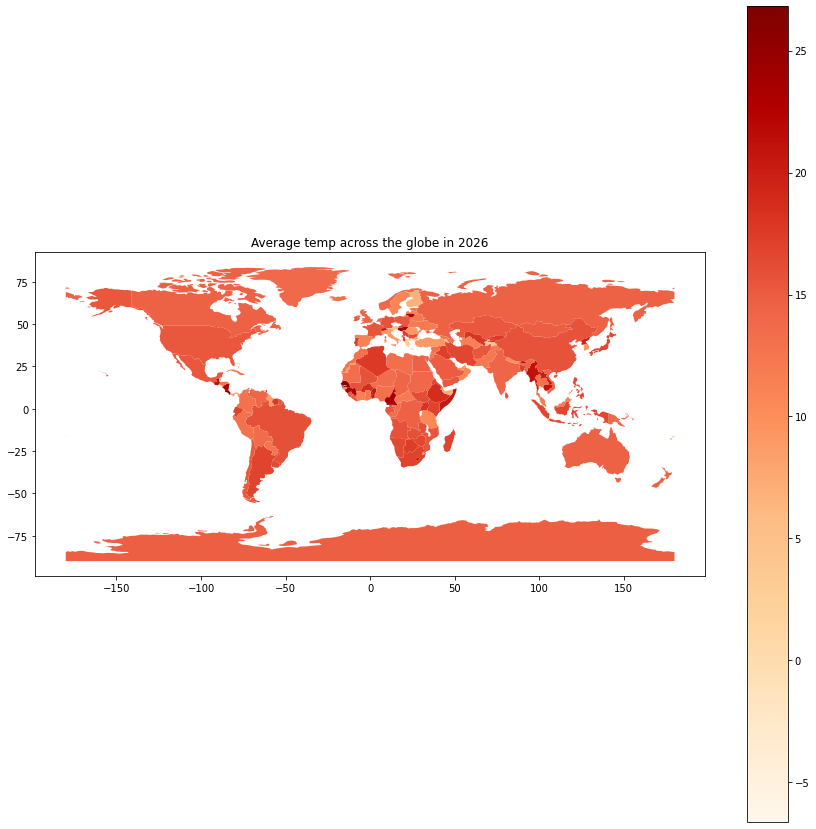

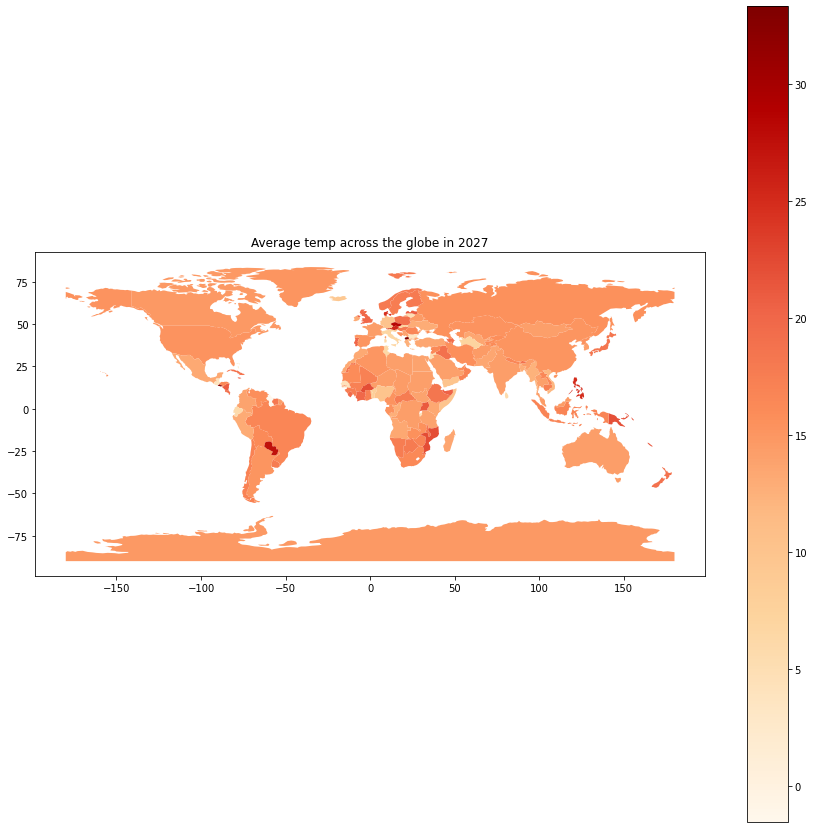

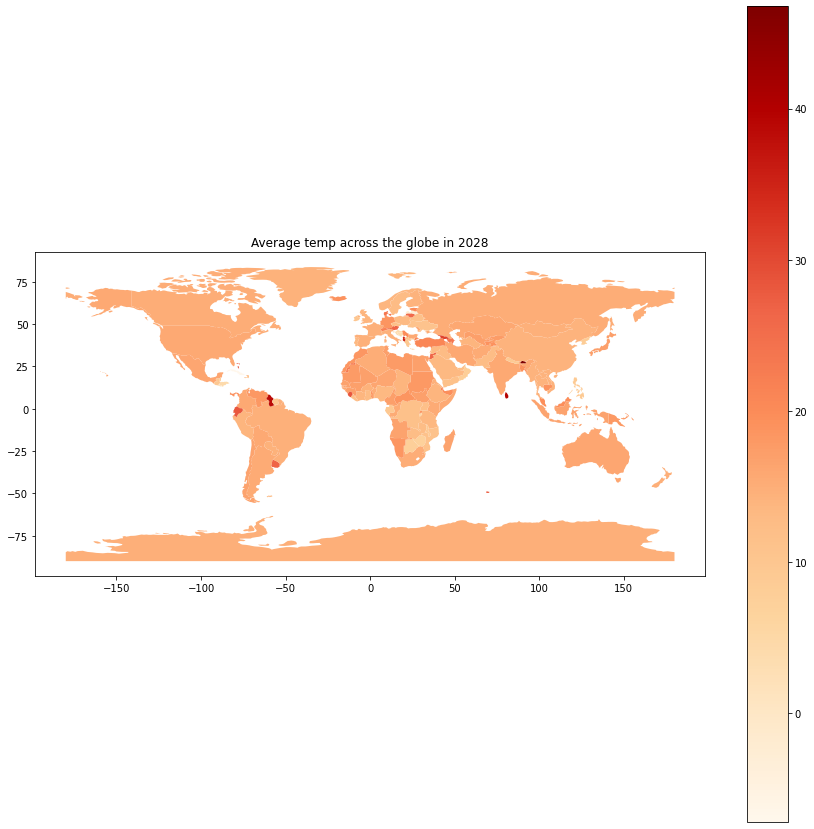

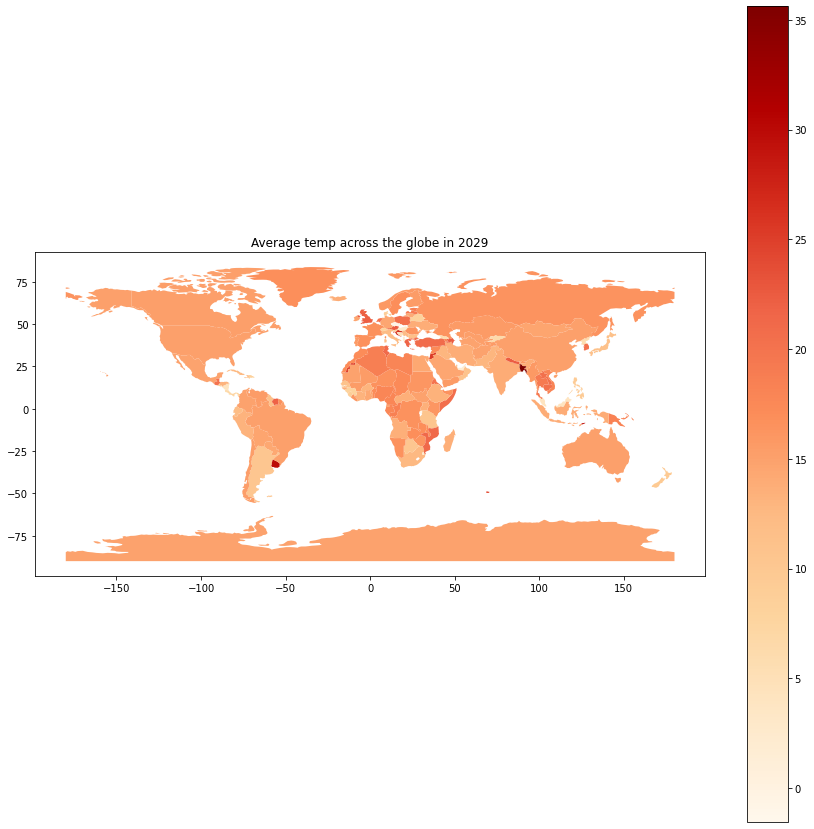

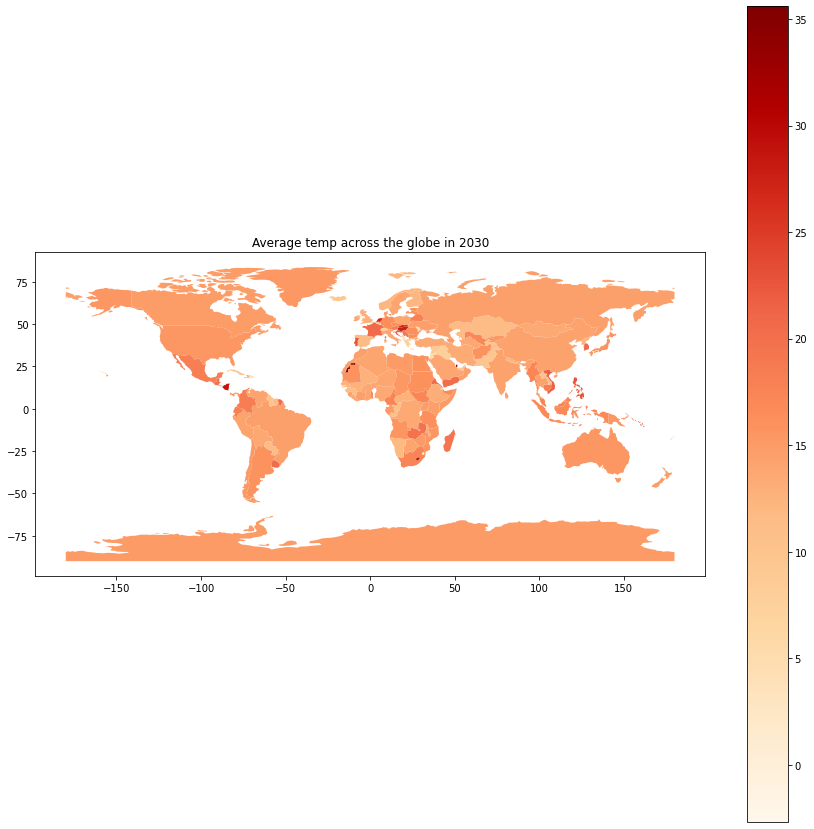

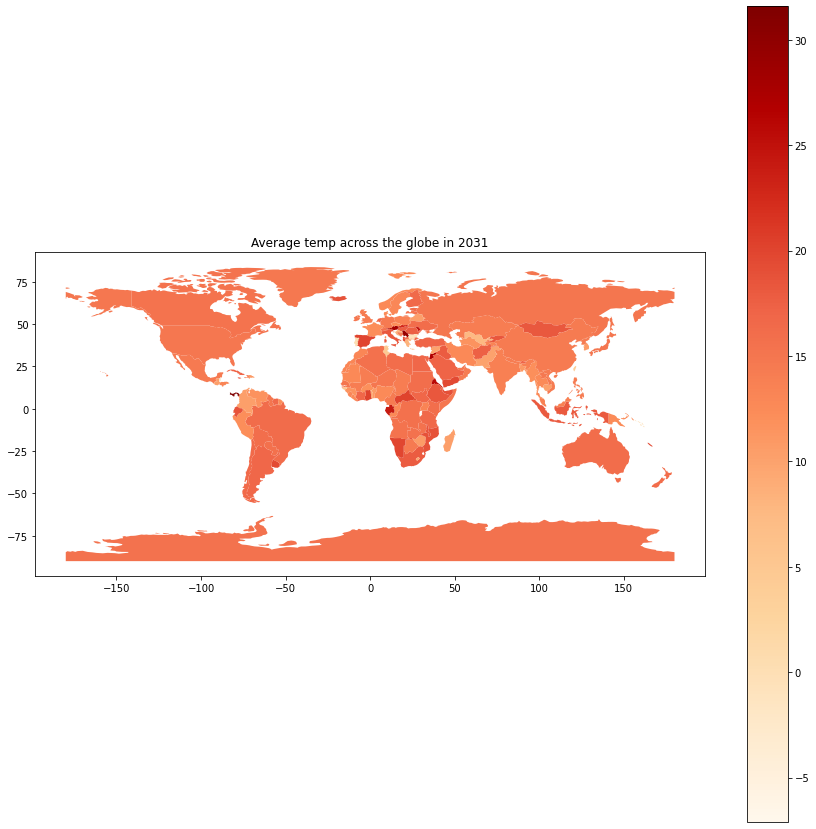

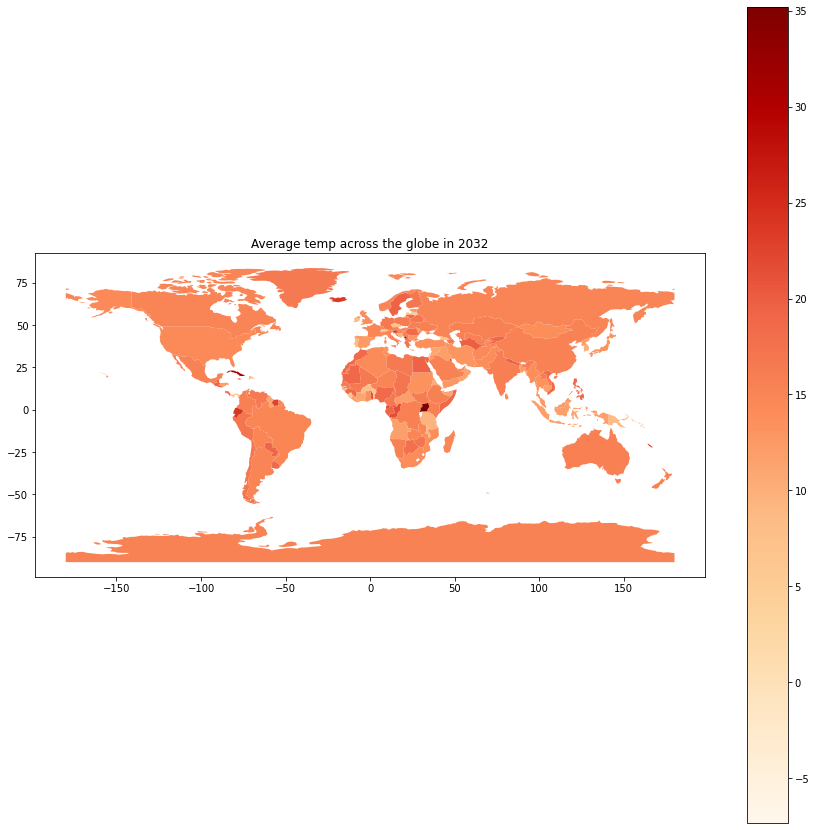

In [9]:

# df1 = df.loc[(df["Observatory"] == "IN")]
yearly_data = []
years = list(range(df["Timestamp"][0].year, df["Timestamp"][len(df["Timestamp"])-1].year+1))
print(years)
for i in range(0,len(years)-1):
    df1 = df.loc[((df["Timestamp"] >= datetime.datetime(years[i],1,1)) & (df["Timestamp"] <= datetime.datetime(years[i+1],1,1)))]
    geometry = [Point(xy[::-1]) for xy in df1['Location']]
    gdf = GeoDataFrame(df1, geometry=geometry)   
    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    temp = []
    year_df = []
    for index, row in world.iterrows():
        temporary = gdf.loc[(gdf["geometry"].within(row["geometry"]))]
        yeardf1 = {}
        yeardf1["name"] = row["name"]
        td = dict(temporary["Temperature"].describe())
        for key in td:
            yeardf1[key] = td[key]
        yeardf1["time"] = years[i]
        year_df.append(yeardf1)
        temp.append(temporary["Temperature"].mean())
    year_df = pd.DataFrame(year_df)
    year_df.to_csv("tempdata"+str(years[i])+".csv")
    world["temperature"] = temp
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    plt.title("Average temp across the globe in "+str(years[i]))
    tempdict = dict(gdf["Temperature"].describe())
    tempdict["year"] = years[i]
    yearly_data.append(tempdict)
    print(years[i])
    world.plot(column='temperature', ax=ax, legend=True, figsize = (20,6), cmap='OrRd')

yearly_data = pd.DataFrame(yearly_data)
    
# ax = world.plot(figsize=(20, 12))
# # world.plot(ax=ax, column="Temperature",marker='o', legend=True)
# gdf.plot(column="Temperature", legend=True, ax=ax , cmap='OrRd')

In [10]:
yearly_data

,count,mean,std,min,25%,50%,75%,max,year
0,15237.0,15.117350,9.986888,-24.700322,8.459189,15.113101,21.809315,57.733875,2018
1,15236.0,15.102842,9.976798,-21.210616,8.417609,15.069367,21.819560,54.810105,2019
2,15029.0,15.032947,9.970652,-23.058432,8.430748,15.125226,21.703783,51.015345,2020
3,15187.0,14.879952,10.025631,-24.474125,8.134973,14.819900,21.665523,54.682289,2021
4,15075.0,15.026419,10.007177,-24.702946,8.356968,15.002874,21.823547,62.010338,2022
5,15291.0,14.952404,9.924877,-24.607473,8.132773,14.991629,21.567309,56.454704,2023
6,15409.0,14.997783,9.969703,-27.098132,8.264784,15.027518,21.751533,51.777327,2024
7,15141.0,15.182006,9.969362,-23.238288,8.421186,15.251131,21.807780,50.692088,2025
8,15262.0,14.785431,9.982332,-27.450048,8.048411,14.790770,21.536068,56.599397,2026
9,15185.0,14.916264,10.058976,-28.572759,8.014212,14.902525,21.717826,51.122288,2027
